In [19]:
import rasterio
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [20]:
tif_path = "../../data/HydroSHEDS/as_acc_3s.tif"

In [21]:
with rasterio.open(tif_path) as src:
    print("📌 CRS (Coordinate Reference System):", src.crs)
    print("📐 Size (width x height):", src.width, "x", src.height)
    print("📦 Number of bands:", src.count)
    print("🧭 Affine transformation (pixel → geographic coordinates):\n", src.transform)

📌 CRS (Coordinate Reference System): EPSG:4326
📐 Size (width x height): 156000 x 72000
📦 Number of bands: 1
🧭 Affine transformation (pixel → geographic coordinates):
 | 0.00, 0.00, 50.00|
| 0.00,-0.00, 60.00|
| 0.00, 0.00, 1.00|


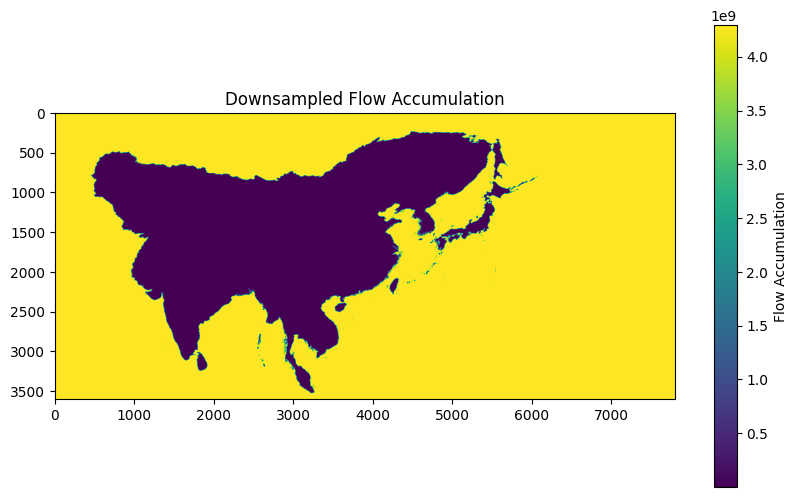

In [22]:
with rasterio.open(tif_path) as src:
    scale = 20
    new_height = src.height // scale
    new_width = src.width // scale
    data = src.read(
        1,
        out_shape=(1, new_height, new_width),
        resampling=rasterio.enums.Resampling.average
    )
    data = np.where(data <= 0, np.nan, data)

plt.figure(figsize=(10, 6))
plt.imshow(data, cmap='viridis')
plt.title("Downsampled Flow Accumulation")
plt.colorbar(label="Flow Accumulation")
plt.show()


In [23]:
import rasterio
import numpy as np
from rasterio.windows import Window
from tqdm import tqdm

tif_path = "../../data/HydroSHEDS/as_acc_3s.tif"
tile_size = 1000

total_valid_points = 0
example_values = []

with rasterio.open(tif_path) as src:
    transform = src.transform
    width = src.width
    height = src.height

    num_tiles_x = (width + tile_size - 1) // tile_size
    num_tiles_y = (height + tile_size - 1) // tile_size

    for tile_y in tqdm(range(num_tiles_y), desc="Scanning for valid points"):
        for tile_x in range(num_tiles_x):
            window = Window(
                col_off=tile_x * tile_size,
                row_off=tile_y * tile_size,
                width=min(tile_size, width - tile_x * tile_size),
                height=min(tile_size, height - tile_y * tile_size)
            )

            band = src.read(1, window=window)
            row_indices, col_indices = np.where(band > 0)
            count = len(row_indices)
            total_valid_points += count

            # collect first 10 values for preview
            if count > 0 and len(example_values) < 10:
                values = band[row_indices, col_indices]
                tile_transform = rasterio.windows.transform(window, transform)
                xs, ys = rasterio.transform.xy(tile_transform, row_indices, col_indices)
                for x, y, val in zip(xs, ys, values):
                    example_values.append((x, y, val))
                    if len(example_values) >= 10:
                        break

# Output
print(f"✅ Estimated number of valid (non-zero) pixels: {total_valid_points}")
print("\n📊 Example rows (longitude, latitude, flow_accumulation):")
for row in example_values:
    print(row)

Scanning for valid points: 100%|██████████| 72/72 [04:40<00:00,  3.90s/it]

✅ Estimated number of valid (non-zero) pixels: 11232000000

📊 Example rows (longitude, latitude, flow_accumulation):
(50.000416666666666, 59.99958333333333, 4294967295)
(50.00125, 59.99958333333333, 4294967295)
(50.00208333333333, 59.99958333333333, 4294967295)
(50.002916666666664, 59.99958333333333, 4294967295)
(50.00375, 59.99958333333333, 4294967295)
(50.004583333333336, 59.99958333333333, 4294967295)
(50.00541666666667, 59.99958333333333, 4294967295)
(50.00625, 59.99958333333333, 4294967295)
(50.007083333333334, 59.99958333333333, 4294967295)
(50.00791666666667, 59.99958333333333, 4294967295)


<pre> ### 🌍 Geographic Bounding Box for Flood Modeling in Bhutan | Parameter | Official Bhutan Extent | Recommended Extended Bounding Box | Reason | |---------------|------------------------|------------------------------------|------------------------------------------------------------------------| | **Latitude** | 26.7° to 28.3° | **25.0° to 29.5°** | Includes upstream sources in Tibet and downstream flood zones in India | | **Longitude** | 88.7° to 92.1° | **87.0° to 93.5°** | Captures lateral river systems and neighboring rainfall regions | | **Area** | ~38,000 km² | ~300,000 km² (approx.) | Sufficient for regional hydrological modeling | | **Includes** | Bhutan only | Bhutan + parts of India, Nepal, China | Necessary for flood inflow/outflow prediction and upstream rainfall | </pre>

In [25]:
import rasterio
import numpy as np
from rasterio.windows import Window
from tqdm import tqdm

tif_path = "../../data/HydroSHEDS/as_acc_3s.tif"
tile_size = 1000

total_valid_points = 0
example_values = []

with rasterio.open(tif_path) as src:
    transform = src.transform
    width = src.width
    height = src.height

    num_tiles_x = (width + tile_size - 1) // tile_size
    num_tiles_y = (height + tile_size - 1) // tile_size

    for tile_y in tqdm(range(num_tiles_y), desc="Scanning for valid points"):
        for tile_x in range(num_tiles_x):
            window = Window(
                col_off=tile_x * tile_size,
                row_off=tile_y * tile_size,
                width=min(tile_size, width - tile_x * tile_size),
                height=min(tile_size, height - tile_y * tile_size)
            )

            band = src.read(1, window=window)
            row_indices, col_indices = np.where(band > 0)
            count = len(row_indices)
            total_valid_points += count

            # collect first 10 values for preview
            if count > 0 and len(example_values) < 10:
                values = band[row_indices, col_indices]
                tile_transform = rasterio.windows.transform(window, transform)
                xs, ys = rasterio.transform.xy(tile_transform, row_indices, col_indices)
                for x, y, val in zip(xs, ys, values):
                    example_values.append((x, y, val))
                    if len(example_values) >= 10:
                        break

# Output
print(f"✅ Estimated number of valid (non-zero) pixels: {total_valid_points}")
print("\n📊 Example rows (longitude, latitude, flow_accumulation):")
for row in example_values:
    print(row)

Scanning for valid points:  54%|█████▍    | 39/72 [01:57<01:39,  3.01s/it]


KeyboardInterrupt: 

### 🌍 Geographic Bounding Box for Flood Modeling in Bhutan

| Parameter   | Official Bhutan Extent | Recommended Extended Bounding Box | Reason                                                                 |
|-------------|------------------------|-----------------------------------|------------------------------------------------------------------------|
| Latitude    | 26.7° to 28.3°         | 25.0° to 29.5°                    | Includes upstream sources in Tibet and downstream flood zones in India |
| Longitude   | 88.7° to 92.1°         | 87.0° to 93.5°                    | Captures lateral river systems and neighboring rainfall regions        |
| Area        | ~38,000 km²            | ~300,000 km² (approx.)           | Sufficient for regional hydrological modeling                          |
| Includes    | Bhutan only            | Bhutan + parts of India, Nepal, China | Necessary for flood inflow/outflow prediction and upstream rainfall    |

In [2]:
import rasterio
import numpy as np
import pandas as pd
from rasterio.windows import Window
from tqdm import tqdm
import os

# 1️⃣ INPUT: constants (don't change)
tif_path = "../../data/HydroSHEDS/as_acc_3s.tif"
tile_size = 1000
min_lon, max_lon = 87.0, 93.5
min_lat_full, max_lat_full = 25.0, 29.5
step = 0.9  # band step (° of latitude)
output_prefix = "../../data/HydroSHEDS/as_acc_3s_"

# 2️⃣ Loop over bands
band_index = 1
lat_start = min_lat_full

while lat_start < max_lat_full:
    lat_end = min(lat_start + step, max_lat_full)
    output_csv = f"{output_prefix}{band_index}.csv"

    if os.path.exists(output_csv):
        print(f"✅ Skipping {output_csv} (already exists)")
        lat_start = lat_end
        band_index += 1
        continue

    print(f"📦 Processing band {band_index}: {lat_start:.1f} to {lat_end:.1f}°")

    filtered_records = []

    with rasterio.open(tif_path) as src:
        transform = src.transform
        width = src.width
        height = src.height
        nodata = src.nodata

        num_tiles_x = (width + tile_size - 1) // tile_size
        num_tiles_y = (height + tile_size - 1) // tile_size

        for tile_y in tqdm(range(num_tiles_y), desc=f"Tiles (lat {lat_start:.1f}–{lat_end:.1f})"):
            for tile_x in range(num_tiles_x):
                window = Window(
                    col_off=tile_x * tile_size,
                    row_off=tile_y * tile_size,
                    width=min(tile_size, width - tile_x * tile_size),
                    height=min(tile_size, height - tile_y * tile_size)
                )

                band = src.read(1, window=window)
                tile_transform = rasterio.windows.transform(window, transform)

                row_indices, col_indices = np.where(
                    (band > 0) & (band != nodata) if nodata is not None else (band > 0)
                )
                if len(row_indices) == 0:
                    continue

                values = band[row_indices, col_indices]
                xs, ys = rasterio.transform.xy(tile_transform, row_indices, col_indices)

                for x, y, val in zip(xs, ys, values):
                    if min_lon <= x <= max_lon and lat_start <= y <= lat_end:
                        filtered_records.append((x, y, val))

    # Save part to file
    df = pd.DataFrame(filtered_records, columns=["longitude", "latitude", "flow_accumulation"])
    df.to_csv(output_csv, index=False)
    print(f"💾 Saved: {output_csv} ({len(df)} rows)\n")

    # Move to next band
    lat_start = lat_end
    band_index += 1

✅ Skipping ../../data/HydroSHEDS/as_acc_3s_1.csv (already exists)
✅ Skipping ../../data/HydroSHEDS/as_acc_3s_2.csv (already exists)
✅ Skipping ../../data/HydroSHEDS/as_acc_3s_3.csv (already exists)
✅ Skipping ../../data/HydroSHEDS/as_acc_3s_4.csv (already exists)
✅ Skipping ../../data/HydroSHEDS/as_acc_3s_5.csv (already exists)
✅ Skipping ../../data/HydroSHEDS/as_acc_3s_6.csv (already exists)


In [3]:
import pandas as pd

# Paths and tracking
file_template = "../../data/HydroSHEDS/as_acc_3s_{}.csv"
all_parts = []
row_counts = []

# Read and track each part
for i in range(1, 7):
    path = file_template.format(i)
    df = pd.read_csv(path)
    count = len(df)
    print(f"📄 File {i}: {count:,} rows")
    row_counts.append(count)
    all_parts.append(df)

# Total expected rows
expected_total = sum(row_counts)
print(f"\n🔢 Expected total rows: {expected_total:,}")

# Concatenate all parts
df_full = pd.concat(all_parts, ignore_index=True)
actual_total = len(df_full)
print(f"✅ Actual total rows in df_full: {actual_total:,}")

# Sanity check
if expected_total == actual_total:
    print("🎉 All rows successfully merged.")
else:
    print("⚠️ Mismatch in row count! Check for missing or duplicated data.")

# Save to single CSV
df_full.to_csv("../../data/HydroSHEDS/full_bhutan_and_buffer_acc.csv", index=False)
print("💾 Saved: full_bhutan_and_buffer_acc.csv")

📄 File 1: 8,424,000 rows
📄 File 2: 8,424,000 rows
📄 File 3: 8,424,000 rows
📄 File 4: 8,424,000 rows
📄 File 5: 8,424,000 rows
📄 File 6: 0 rows

🔢 Expected total rows: 42,120,000
✅ Actual total rows in df_full: 42,120,000
🎉 All rows successfully merged.
💾 Saved: full_bhutan_and_buffer_acc.csv


In [4]:
# 🧹 Clear large variables and free memory

import gc  # garbage collector

# ✅ Optionally delete specific large variables if they exist
for var_name in ["df", "df_full", "all_parts", "row_counts", "filtered_records"]:
    if var_name in globals():
        del globals()[var_name]
        print(f"🗑️ Deleted variable: {var_name}")

# 🧠 Explicitly run garbage collection to free memory
gc.collect()

print("✅ Memory cleaned up. Ready for next steps.")

🗑️ Deleted variable: df
🗑️ Deleted variable: df_full
🗑️ Deleted variable: all_parts
🗑️ Deleted variable: row_counts
✅ Memory cleaned up. Ready for next steps.


In [5]:
import pandas as pd

# Reload the merged CSV file after kernel reset
file_path = "../../data/HydroSHEDS/full_bhutan_and_buffer_acc.csv"
df_full = pd.read_csv(file_path)

# Check for duplicate rows
has_duplicates = df_full.duplicated().any()
duplicate_count = df_full.duplicated().sum()

# Get min and max for longitude and latitude
min_longitude = df_full["longitude"].min()
max_longitude = df_full["longitude"].max()
min_latitude = df_full["latitude"].min()
max_latitude = df_full["latitude"].max()

# Prepare results
{
    "has_duplicates": has_duplicates,
    "duplicate_count": duplicate_count,
    "min_longitude": min_longitude,
    "max_longitude": max_longitude,
    "min_latitude": min_latitude,
    "max_latitude": max_latitude,
    "total_rows": len(df_full)
}

{'has_duplicates': False,
 'duplicate_count': 0,
 'min_longitude': 87.00041666666665,
 'max_longitude': 93.49958333333332,
 'min_latitude': 25.00041666666668,
 'max_latitude': 29.49958333333334,
 'total_rows': 42120000}

# 📊 EDA of Flow Accumulation Data for Flood Forecasting in Bhutan and Surrounding Region

*Statistical analysis to understand hydrological dynamics and assess its suitability for Machine Learning models.*

---

## 1 General Dataset Overview  
### 🔍 Loading and Inspecting the Dataset

This step helps us understand the basic structure and quality of the dataset before performing deeper exploratory analysis.

**Key steps:**

- **Check the number of rows and columns**  
- **Review column names and data types**  
- **Verify missing values, duplicates, and any anomalies**  



In [ ]:
# Load the CSV file
df = pd.read_csv("../../data/HydroSHEDS/full_bhutan_and_buffer_acc.csv")

# Get basic info about the dataset (column names, types, non-null counts)
df.info()

# Generate descriptive statistics for numeric columns
df.describe()

# Check for missing values in each column
df.isnull().sum()

# Count the number of duplicate rows
df.duplicated().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42120000 entries, 0 to 42119999
Data columns (total 3 columns):
 #   Column             Dtype  
---  ------             -----  
 0   longitude          float64
 1   latitude           float64
 2   flow_accumulation  int64  
dtypes: float64(2), int64(1)
memory usage: 964.1 MB


0

## 2. Geospatial Extent & Distribution
📌 Exploring the spatial coverage and density of the dataset

This section helps verify whether the dataset spatially aligns with the Bhutan and buffer region.
It also reveals how flow accumulation is distributed geographically.

**Key steps:**
- **Check the minimum and maximum latitude & longitude**
- **Validate if the data covers the correct geographic area**
- **Visualize spatial distribution using a 2D histogram (heatmap)**





📍 Geographic Extent (describe):
          longitude      latitude
count  4.212000e+07  4.212000e+07
mean   9.025000e+01  2.725000e+01
std    1.876388e+00  1.299038e+00
min    8.700042e+01  2.500042e+01
25%    8.862521e+01  2.612521e+01
50%    9.025000e+01  2.725000e+01
75%    9.187479e+01  2.837479e+01
max    9.349958e+01  2.949958e+01


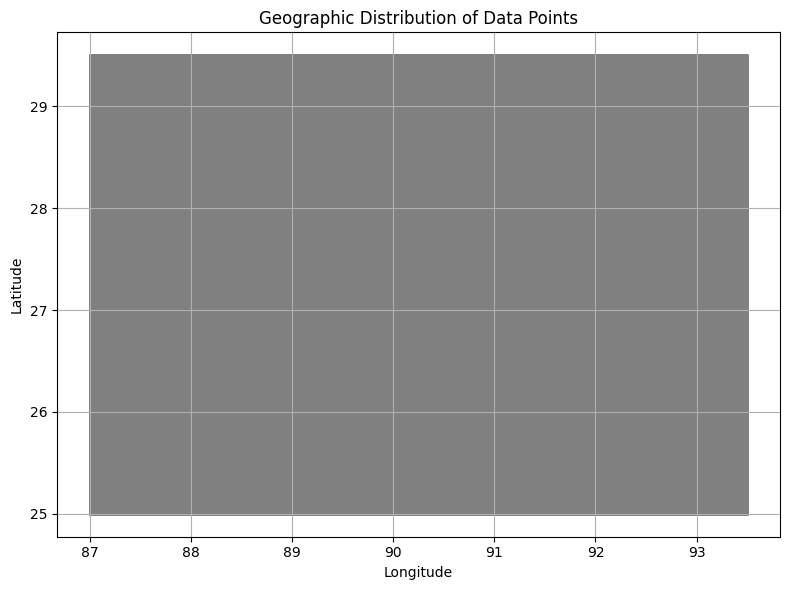

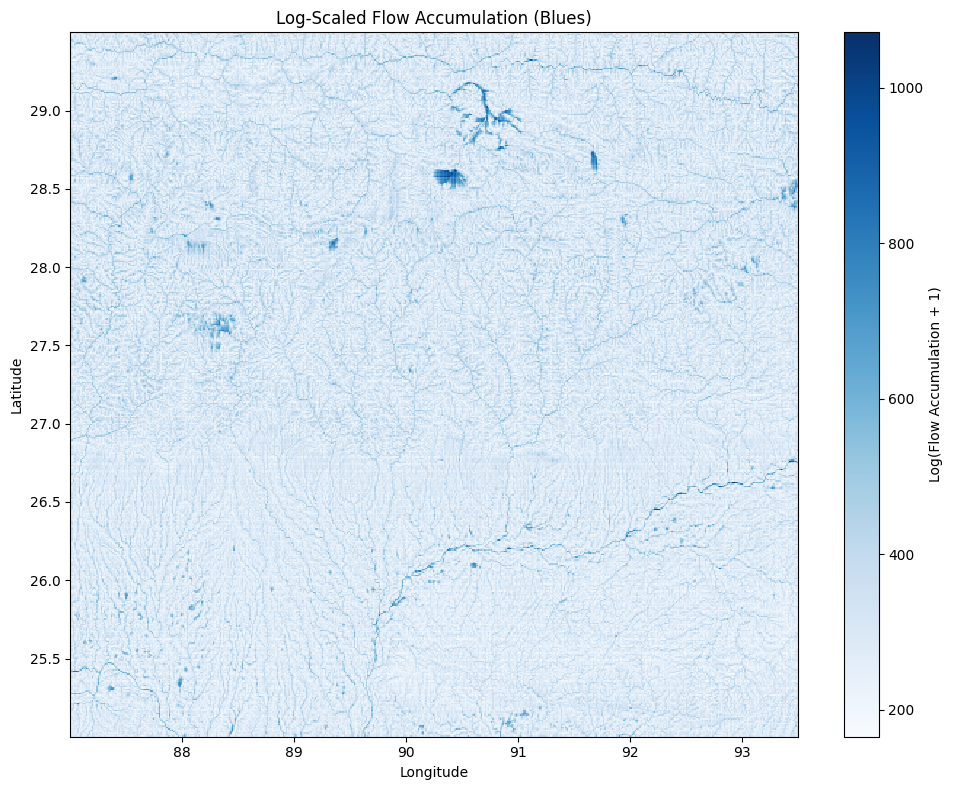

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# 📥 Load the dataset (adjust the path if needed)
df = pd.read_csv("../../data/HydroSHEDS/full_bhutan_and_buffer_acc.csv")

# 🗺️ 1. Summary statistics for latitude and longitude
print("📍 Geographic Extent (describe):")
print(df[['longitude', 'latitude']].describe())

# 🧭 2. Scatter plot to visualize coverage of the dataset
plt.figure(figsize=(8, 6))
plt.scatter(df['longitude'], df['latitude'], s=0.1, alpha=0.5, color='grey')
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.title("Geographic Distribution of Data Points")
plt.grid(True)
plt.tight_layout()
plt.show()

# 💧 3. Heatmap (2D histogram) of log-scaled flow accumulation
plt.figure(figsize=(10, 8))
plt.hist2d(
    df["longitude"],
    df["latitude"],
    bins=500,
    weights=np.log1p(df["flow_accumulation"]),  # log scale for better contrast
    cmap="Blues"
)
plt.colorbar(label="Log(Flow Accumulation + 1)")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.title("Log-Scaled Flow Accumulation (Blues)")
plt.tight_layout()
plt.show()

## 3. Statistical Summary & Flow Accumulation Patterns
📊 Understanding the distribution of flow accumulation values and detecting outliers

This section provides a deeper look into the flow_accumulation values. It helps identify the overall shape of the data distribution, check for skewness or heavy-tailed patterns, and spot possible outliers or anomalies that could affect model training.

🔍 Key Steps:

- Display summary statistics of flow_accumulation

- Visualize the distribution
 
- Identify and examine high-value accumulations

📈 Descriptive statistics of 'flow_accumulation':
count    4.212000e+07
mean     1.703329e+04
std      9.898151e+05
min      1.000000e+00
25%      1.000000e+00
50%      3.000000e+00
75%      8.000000e+00
max      1.208338e+08
Name: flow_accumulation, dtype: float64


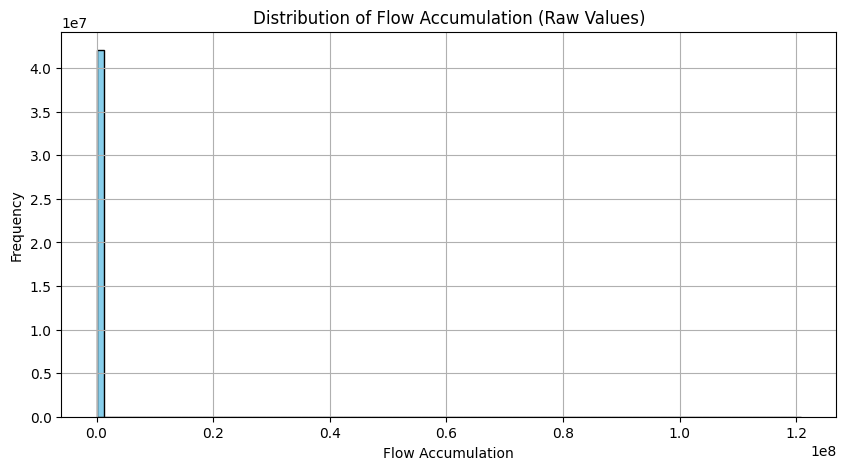

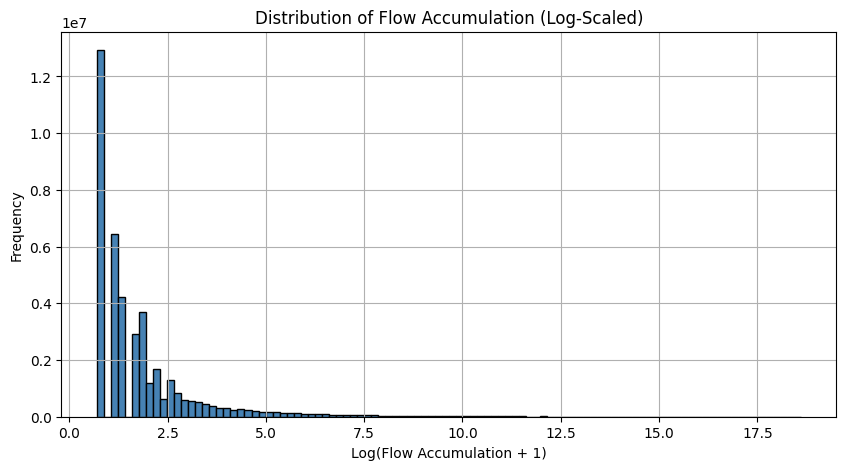

⚠️ Rows with top 0.1% flow accumulation values: 42120
         longitude   latitude  flow_accumulation
2223567  87.972917  25.000417          120833805
2222566  87.972083  25.001250          120833800
2221565  87.971250  25.002083          120833711
2220564  87.970417  25.002917          120833682
2219563  87.969583  25.003750          120833663


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# --- Summary statistics for flow_accumulation ---
print("📈 Descriptive statistics of 'flow_accumulation':")
print(df["flow_accumulation"].describe())

# --- Histogram of raw flow_accumulation values ---
plt.figure(figsize=(10, 5))
plt.hist(df["flow_accumulation"], bins=100, color="skyblue", edgecolor="black")
plt.title("Distribution of Flow Accumulation (Raw Values)")
plt.xlabel("Flow Accumulation")
plt.ylabel("Frequency")
plt.grid(True)
plt.show()

# --- Histogram of log-transformed flow_accumulation values ---
plt.figure(figsize=(10, 5))
log_values = np.log1p(df["flow_accumulation"])
plt.hist(log_values, bins=100, color="steelblue", edgecolor="black")
plt.title("Distribution of Flow Accumulation (Log-Scaled)")
plt.xlabel("Log(Flow Accumulation + 1)")
plt.ylabel("Frequency")
plt.grid(True)
plt.show()

# --- Identify high-value outliers (top 0.1%) ---
high_flows = df[df["flow_accumulation"] > df["flow_accumulation"].quantile(0.999)]
print(f"⚠️ Rows with top 0.1% flow accumulation values: {len(high_flows)}")
print(high_flows.sort_values(by="flow_accumulation", ascending=False).head())

⚠️ Top 1% flow_accumulation threshold: 5,010
🔢 Number of rows in top 1%: 421,201


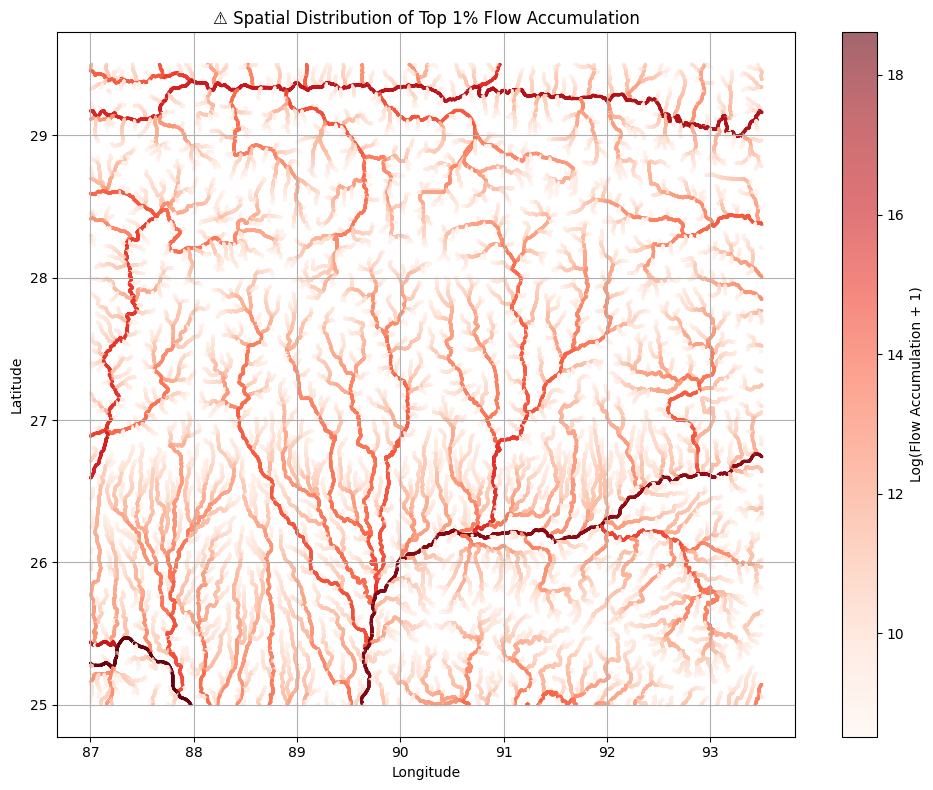

In [26]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Load the dataset
df = pd.read_csv("../../data/HydroSHEDS/full_bhutan_and_buffer_acc.csv")

# Calculate the threshold for the top 1%
threshold = df["flow_accumulation"].quantile(0.99)

# Filter top 1% values
df_top_1 = df[df["flow_accumulation"] >= threshold]

# Show basic info
print(f"⚠️ Top 1% flow_accumulation threshold: {threshold:,.0f}")
print(f"🔢 Number of rows in top 1%: {len(df_top_1):,}")

# Plot
plt.figure(figsize=(10, 8))
plt.scatter(
    df_top_1["longitude"],
    df_top_1["latitude"],
    c=np.log1p(df_top_1["flow_accumulation"]),
    cmap="Reds",
    s=1.5,
    alpha=0.6
)
plt.colorbar(label="Log(Flow Accumulation + 1)")
plt.title("⚠️ Spatial Distribution of Top 1% Flow Accumulation")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.grid(True)
plt.tight_layout()
plt.show()

⚠️ Top 0.1% threshold: 724496.0040000081
🔢 Number of anomaly points: 42,120


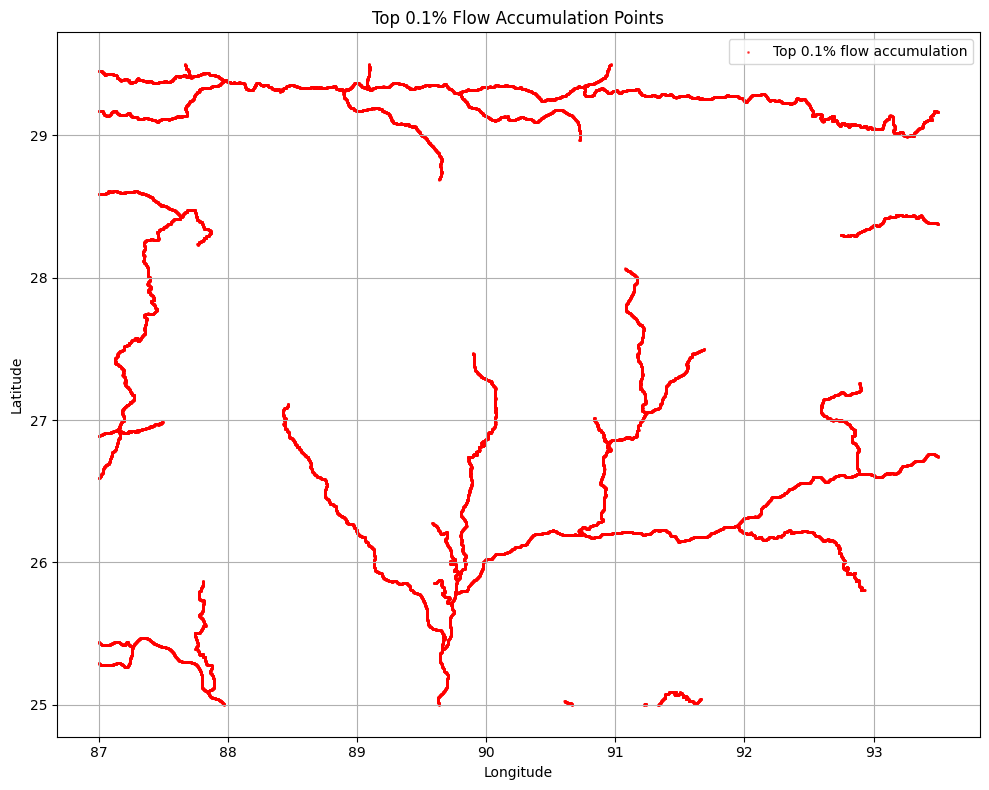

In [3]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset (або використовуй df, якщо вже в памʼяті)
df = pd.read_csv("../../data/HydroSHEDS/full_bhutan_and_buffer_acc.csv")

# Calculate the threshold for top 0.1%
threshold_01 = df["flow_accumulation"].quantile(0.999)

# Filter anomalies
df_anomalies_01 = df[df["flow_accumulation"] >= threshold_01]

# Print stats
print(f"⚠️ Top 0.1% threshold: {threshold_01}")
print(f"🔢 Number of anomaly points: {len(df_anomalies_01):,}")

# Plot
plt.figure(figsize=(10, 8))
plt.scatter(
    df_anomalies_01["longitude"],
    df_anomalies_01["latitude"],
    s=1,
    c="red",
    alpha=0.6,
    label="Top 0.1% flow accumulation"
)
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.title("Top 0.1% Flow Accumulation Points")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

## 4. Bin/Quantile Segmentation
📊 Categorizing flow accumulation into quantile-based segments

Dividing continuous flow accumulation values into four categories (`low`, `medium`, `high`, `extreme`) helps simplify analysis and visualization.  
This can be especially useful in geospatial ML models and flood risk assessment.

**Key steps:**
- **Divide data into 3 quantiles (equal-sized bins)**
- **Assign labels for better interpretability**


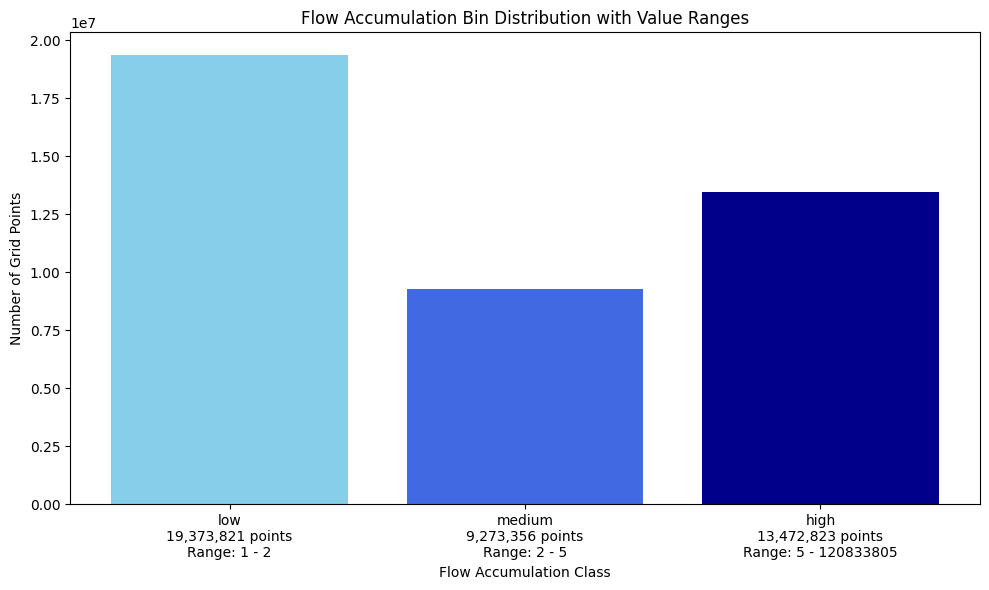

In [11]:
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv("../../data/HydroSHEDS/full_bhutan_and_buffer_acc.csv")

# Segment into 3 quantiles
quantiles = pd.qcut(
    df["flow_accumulation"],
    q=3,
    labels=["low", "medium", "high"],
    retbins=True,
    duplicates="drop"
)
df["acc_class"] = quantiles[0]
bins = quantiles[1]  # These are the bin edges

# Get counts per class
class_counts = df["acc_class"].value_counts().sort_index()

# Prepare labels with range and count
labels_with_ranges = []
for i, label in enumerate(class_counts.index):
    count = class_counts[label]
    bin_min = int(bins[i])
    bin_max = int(bins[i + 1])
    label_str = f"{label}\n{count:,} points\nRange: {bin_min} - {bin_max}"
    labels_with_ranges.append(label_str)

# Define bar colors
colors = ["skyblue", "royalblue", "darkblue"]

# Plot the distribution
plt.figure(figsize=(10, 6))
plt.bar(labels_with_ranges, class_counts.values, color=colors)
plt.xlabel("Flow Accumulation Class")
plt.ylabel("Number of Grid Points")
plt.title("Flow Accumulation Bin Distribution with Value Ranges")
plt.tight_layout()
plt.show()



## 🗺️ 5. Geospatial Visualization

This step involves creating an interactive heatmap to visualize the geographic distribution of flow accumulation data using the `folium` library.

In [1]:
import pandas as pd
import folium
from folium.plugins import HeatMap

# Load data
try:
    df = pd.read_csv("../../data/HydroSHEDS/full_bhutan_and_buffer_acc.csv")
except Exception as e:
    print(f"❌ Failed to load CSV: {e}")
    raise

# Optional: Reduce data to avoid kernel crash
try:
    threshold = df["flow_accumulation"].quantile(0.99)
    df_top = df[df["flow_accumulation"] <= threshold].copy()

    # Normalize weights
    max_val = df_top["flow_accumulation"].max()
    if max_val == 0:
        raise ValueError("Max flow_accumulation is zero, cannot normalize.")
    df_top["normalized"] = df_top["flow_accumulation"] / max_val

    # Reduce to 100,000 points max
    if len(df_top) > 100_000:
        df_top = df_top.sample(n=100_000, random_state=42)
except Exception as e:
    print(f"❌ Failed during preprocessing: {e}")
    raise

# Create map
try:
    map_center = [df_top["latitude"].mean(), df_top["longitude"].mean()]
    m = folium.Map(location=map_center, zoom_start=7, tiles="CartoDB positron")

    heat_data = df_top[["latitude", "longitude", "normalized"]].values.tolist()
    HeatMap(heat_data, radius=7, blur=5, max_zoom=10).add_to(m)

    display(m)
except Exception as e:
    print(f"❌ Failed to render map: {e}")
    raise